In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

from pymystem3 import Mystem

import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [32]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\marGO.LAPTOP-
[nltk_data]     CEGVK39N\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\marGO.LAPTOP-
[nltk_data]     CEGVK39N\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
def Lemmatize(src: list):
    ''' Лемматизирует переданный датасет
    '''
    text_nomalized = ' '.join(src).lower() 

    m = Mystem()
    lemmas = m.lemmatize(text_nomalized)
    
    return lemmas

In [76]:
data = pd.read_csv('dataframe.csv')
data = data.head(5)
print(data)

   mark                                    text_of_comment
0     1  Сразу отвечаю на вопрос, почему я решила прочи...
1     1  Эта сказка хоть и сказка,но учит всех людей то...
2     1  Несомненно видно мастерство автора, который с ...
3     1  Эта сказка хоть и сказка,но учит всех людей то...
4     1  Несомненно видно мастерство автора, который с ...


In [77]:
data.dropna(inplace=True)
remove_non_alphabets = lambda x: re.sub(r'[^а-яА-Я]',' ',str(x))

tokenize = lambda x: word_tokenize(x, language = "russian")

ps = PorterStemmer()
stem = lambda w: [ ps.stem(x) for x in w ]

print('remove_non_alphabets')
data['text_of_comment'] = data['text_of_comment'].apply(remove_non_alphabets)

print('tokenize')
data['text_of_comment'] = data['text_of_comment'].apply(tokenize) 

print('stem')
data['text_of_comment'] = data['text_of_comment'].apply(stem)

print('Lemmatize')

for words_list in tqdm(data['text_of_comment']):
    words_list = Lemmatize(words_list)


print('complete')
data['text_of_comment'] = data['text_of_comment'].apply(lambda x: ' '.join(x))

data.dropna(inplace=True)

print(data)

remove_non_alphabets
tokenize
stem
Lemmatize


100%|██████████| 5/5 [00:09<00:00,  1.97s/it]

complete
   mark                                    text_of_comment
0     1  сразу отвечаю на вопрос почему я решила прочит...
1     1  эта сказка хоть и сказка но учит всех людей то...
2     1  несомненно видно мастерство автора который с п...
3     1  эта сказка хоть и сказка но учит всех людей то...
4     1  несомненно видно мастерство автора который с п...


In [78]:
stopWords = stopwords.words('russian')

vectorizer = CountVectorizer(stop_words=stopWords)
sparse_matrix = vectorizer.fit_transform(data['text_of_comment']).toarray()
print(sparse_matrix)
sparse_matrix.shape

[[0 0 0 1 1 0 1 1 0 0 0 0 1 2 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 2 1 0 1 0
  0 0 1 0 0 0 0 1 4 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 2 0 0 1 0 0
  0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 2 1 1 0 1 0 1 0 0 0
  0 0 0 0 3 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0]
 [1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 2 1 0 1 1 0 1 1 0 0 2 0 1
  1 1 0 0 1 1 2 0 0 1 1 0 2 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1
  0 1 1 2 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

(5, 143)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(sparse_matrix, np.array(data['mark']), test_size = 0.1, train_size = 0.8)

In [80]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(143, 143)
        self.linear2 = nn.Linear(143, 143)
        self.linear3 = nn.Linear(143, 143)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [81]:
model = LogisticRegression()

In [82]:
x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()

In [83]:
epochs = 9
model.train()
loss_values = []
i = 0.01
for epoch in range(epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(params=model.parameters() , lr=i)
    optimizer
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss_values.append(loss.item())
    pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
    acc = pred * 100.0 / len(x_train)
    print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.numpy()))
    if epoch%3 == 0: i+=0.3 
    loss.backward()
    optimizer.step()

Epoch: 1, Loss: 5.011656284332275, Accuracy: 0.0%
Epoch: 2, Loss: 3.8426613807678223, Accuracy: 100.0%
Epoch: 3, Loss: 0.0, Accuracy: 100.0%
Epoch: 4, Loss: 0.0, Accuracy: 100.0%
Epoch: 5, Loss: 0.0, Accuracy: 100.0%
Epoch: 6, Loss: 0.0, Accuracy: 100.0%
Epoch: 7, Loss: 0.0, Accuracy: 100.0%
Epoch: 8, Loss: 0.0, Accuracy: 100.0%
Epoch: 9, Loss: 0.0, Accuracy: 100.0%


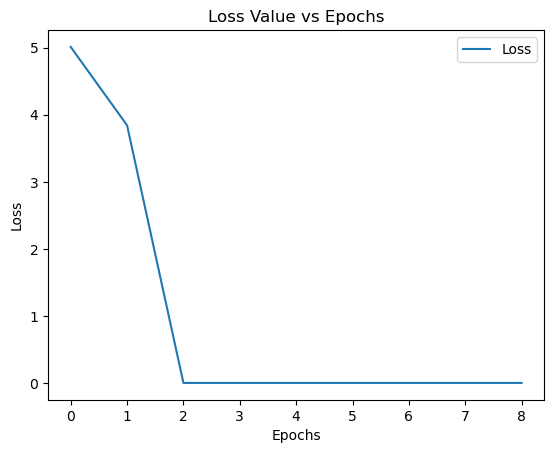

In [84]:
plt.plot(loss_values)
plt.title('Loss Value vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.show()

In [85]:
x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [86]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    loss = criterion(y_pred, y_test)
    pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
    print ("Accuracy : {}%".format(100*pred/len(x_test)))

Accuracy : 100.0%
